In [28]:
import pandas as pd
import numpy as np
chunk = pd.read_csv("./Anime dataset 2023/final_animedataset.csv", chunksize=1000000)

for df in chunk:
    break
df.head(5)

,username,anime_id,my_score,user_id,gender,title,type,source,score,scored_by,rank,popularity,genre
0,karthiga,21,9,2255153,Female,One Piece,TV,Manga,8.54,423868,91.0,35,"Action, Adventure, Comedy, Super Power, Drama,..."
1,karthiga,59,7,2255153,Female,Chobits,TV,Manga,7.53,175388,1546.0,188,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen"
2,karthiga,74,7,2255153,Female,Gakuen Alice,TV,Manga,7.77,33244,941.0,1291,"Comedy, School, Shoujo, Super Power"
3,karthiga,120,7,2255153,Female,Fruits Basket,TV,Manga,7.77,167968,939.0,222,"Slice of Life, Comedy, Drama, Romance, Fantasy..."
4,karthiga,178,7,2255153,Female,Ultra Maniac,TV,Manga,7.26,9663,2594.0,2490,"Magic, Comedy, Romance, School, Shoujo"


In [29]:
print(df.shape)
genre = df['genre'].str.split(', ')
unique_genre = list({x for l in genre.dropna() for x in l})
df1 = pd.DataFrame(df)
for i in unique_genre:
    df1[i] = genre.map(lambda x: i in x, na_action="ignore")
print(df1.head(5))

(1000000, 13)
   username  anime_id  my_score  user_id  gender          title type source  \
0  karthiga        21         9  2255153  Female      One Piece   TV  Manga   
1  karthiga        59         7  2255153  Female        Chobits   TV  Manga   
2  karthiga        74         7  2255153  Female   Gakuen Alice   TV  Manga   
3  karthiga       120         7  2255153  Female  Fruits Basket   TV  Manga   
4  karthiga       178         7  2255153  Female   Ultra Maniac   TV  Manga   

   score  scored_by    rank  popularity  \
0   8.54     423868    91.0          35   
1   7.53     175388  1546.0         188   
2   7.77      33244   941.0        1291   
3   7.77     167968   939.0         222   
4   7.26       9663  2594.0        2490   

                                               genre Action  Magic  \
0  Action, Adventure, Comedy, Super Power, Drama,...   True  False   
1      Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen  False  False   
2                Comedy, School, Shoujo, S

In [4]:
unique_genre

['Action',
 'Magic',
 'Martial Arts',
 'Sci-Fi',
 'Seinen',
 'Mystery',
 'Police',
 'Shoujo Ai',
 'Kids',
 'Sports',
 'Cars',
 'Super Power',
 'Samurai',
 'Space',
 'School',
 'Thriller',
 'Psychological',
 'Mecha',
 'Yuri',
 'Romance',
 'Music',
 'Dementia',
 'Comedy',
 'Harem',
 'Adventure',
 'Supernatural',
 'Horror',
 'Slice of Life',
 'Game',
 'Demons',
 'Parody',
 'Shounen',
 'Drama',
 'Military',
 'Fantasy',
 'Vampire',
 'Historical',
 'Shounen Ai',
 'Hentai',
 'Yaoi',
 'Josei',
 'Shoujo',
 'Ecchi']

In [5]:
#Check if there are mismatches among the same anime. Takes forever to run.(7700k 7:40 min)
#for title in df1["title"].unique():
#    genre_val = df1[df1["title"]==title][unique_genre].sum()
#    if (np.unique(genre_val).size > 2):
#        print("Theres genre mismatch for title", title)

In [26]:
sex = (df1["Hentai"]==True) | (df1["Ecchi"]==True) | (df1["Harem"]==True) | (df1["Yaoi"]==True)
print(df1.loc[sex & (df1["gender"]=="Male")]["my_score"].mean())
print(df1.loc[sex & (df1["gender"]=="Male")]["my_score"].std())
print(df1.loc[sex & (df1["gender"]=="Female")]["my_score"].mean())
print(df1.loc[sex & (df1["gender"]=="Female")]["my_score"].std())

4.400036469730124
3.653195543358055
3.778396353310417
3.681743038838882


In [27]:
best = ("", 0)
for title in df1.loc[sex]["title"].unique():
    score = df1.loc[sex & (df1["title"]==title)]["score"].mean()
    if score > best[1]:
        best = (title, score)
    print(title, score)
print("Best sex", best)

Chobits 7.529999999999999
Ouran Koukou Host Club 8.340000000000002
Air Gear 7.64
Crayon Shin-chan 7.730000000000002
Kiniro no Corda: Primo Passo 7.630000000000001
Chu-Bra!! 6.299999999999998
B-gata H-kei 7.100000000000001
Sunabouzu 7.519999999999997
Golden Boy 8.04
Mahoromatic: Automatic Maiden 7.260000000000001
A Kite 6.659999999999997
Bokusatsu Tenshi Dokuro-chan 6.75
Gantz 7.200000000000002
Gantz 2nd Stage 7.220000000000001
Enzai 5.480000000000002
Sensitive Pornograph 6.990000000000002
Papa to Kiss in the Dark 6.380000000000001
Haru wo Daite Ita 6.93
Gakuen Heaven 6.74
Kikoushi Enma 7.230000000000003
Boku no Pico 4.990000000000001
Okane ga Nai 6.490000000000001
Fuyu no Semi 7.700000000000003
Saigo no Door wo Shimero! 6.709999999999999
School Days 6.019999999999997
Kirepapa. 6.9399999999999995
Sekirei 7.319999999999999
White Album 6.680000000000001
Pico x CoCo x Chico 5.019999999999997
ChäoS;HEAd 6.519999999999996
Kiss x Sis 7.19
Pico to Chico 5.040000000000001
Helter Skelter: Hakuda

In [8]:
pd.set_option('display.max_columns', None)
df1.loc[df1["title"]==best[0]].head(1)

,username,anime_id,my_score,user_id,gender,title,type,source,score,scored_by,rank,popularity,genre,Action,Magic,Martial Arts,Sci-Fi,Seinen,Mystery,Police,Shoujo Ai,Kids,Sports,Cars,Super Power,Samurai,Space,School,Thriller,Psychological,Mecha,Yuri,Romance,Music,Dementia,Comedy,Harem,Adventure,Supernatural,Horror,Slice of Life,Game,Demons,Parody,Shounen,Drama,Military,Fantasy,Vampire,Historical,Shounen Ai,Hentai,Yaoi,Josei,Shoujo,Ecchi
11,karthiga,853,7,2255153,Female,Ouran Koukou Host Club,TV,Manga,8.34,335137,205.0,69,"Comedy, Harem, Romance, School, Shoujo",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [9]:

best_dementia = ("", 0)
for title in df1.loc[df1["Dementia"]==True]["title"].unique():
    score = df1.loc[df1["title"]==title]["score"].mean()
    if score > best_dementia[1]:
        best_dementia = (title, score)
    print(title, score)
print("Best dementia", best_dementia)

Neon Genesis Evangelion 8.319999999999999
Neon Genesis Evangelion: The End of Evangelion 8.480000000000004
FLCL 8.069999999999997
Mousou Dairinin 7.730000000000001
Serial Experiments Lain 8.0
Boogiepop wa Warawanai: Boogiepop Phantom 7.21
Perfect Blue 8.319999999999999
Nekojiru-sou 7.419999999999999
Mind Game 7.85
Tenshi no Tamago 7.629999999999998
Higurashi no Naku Koro ni 8.099999999999998
Paprika 8.120000000000001
Koroshiya 1 The Animation: Episode 0 5.860000000000001
Genius Party 7.340000000000002
Mawaru Penguindrum 8.03
Yami Shibai 7.179999999999999
Yami Shibai 2 6.55
Ousama Game The Animation 5.18
Kaze no Na wa Amnesia 6.529999999999999
Shoujo Kakumei Utena: Adolescence Mokushiroku 7.6
Ryokunohara Meikyuu 5.19
Kanashimi no Belladonna 7.2
Connected 6.120000000000001
Ai 4.4
Genius Party Beyond 7.3500000000000005
3-tsu no Kumo 4.96
Panty & Stocking in Sanitarybox 6.5
Utsu Musume Sayuri 2.08
00:08 5.02
Tamala 2010: A Punk Cat in Space 6.66
Inaka Isha 6.799999999999995
Kikumana 5.94
T

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Fantasy'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Sci-Fi'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Shounen'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'School'),
  Text(9, 0, 'Hentai'),
  Text(10, 0, 'Supernatural'),
  Text(11, 0, 'Slice of Life'),
  Text(12, 0, 'Mecha'),
  Text(13, 0, 'Magic'),
  Text(14, 0, 'Ecchi'),
  Text(15, 0, 'Seinen'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'Mystery'),
  Text(18, 0, 'Shoujo'),
  Text(19, 0, 'Historical'),
  Text(20, 0, 'Military'),
  Text(21, 0, 'Super Power'),
  Text(22, 0, 'Sports'),
  Text(23, 0, 'Kids'),
  Text(24, 0, 'Harem'),
  Text(25, 0, 'Space'),
  Text(26, 0, 'Horror'),
  Text(27, 0, 'Parody'),
  Text(28, 0, 'Demons'),
  Text(29, 0, 

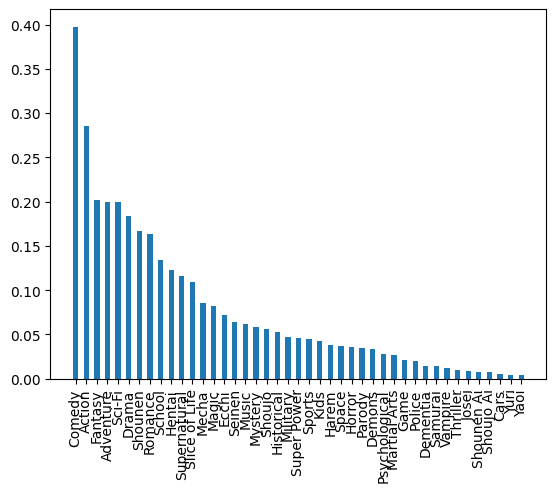

In [36]:
import matplotlib.pyplot as plt
title_genre_count = []
for i in unique_genre:
    title_genre_count.append(df.loc[df1[i]==True]["title"].unique().size)
k = pd.DataFrame({"genre":unique_genre, "count":title_genre_count}).sort_values("count", ascending=False)
plt.bar(k["genre"],k["count"]/df1["title"].unique().size, width=0.5)
plt.xticks(rotation=90)